In [1]:
# Import Electricity Map utilities
from utils import *

# Enable inline plotting
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
df = get_state(['BE', 'DK', 'HU'], '2017-02-01', '2017-02-12', 60)

{u'totalImport': 1724, u'countryCode': u'BE', u'exchange': {u'FR': -1447, u'NL': 1724}, u'totalExport': 1447, u'maxImport': 1724, u'price': {u'value': 50, u'datetime': u'2017-02-01T00:00:00.000Z'}, u'storage': {u'hydro': 0}, u'datetime': u'2017-02-01T00:00:00.000Z', u'exchangeCo2Intensities': {u'FR': 232.37988271543585, u'NL': 232.37988271543585}, u'source': u'entsoe.eu', u'maxProduction': 4989, u'production': {u'oil': 0, u'nuclear': 4989, u'gas': 3437, u'biomass': 332, u'coal': 0, u'solar': 0, u'unknown': 725, u'wind': 313, u'hydro': 265}, u'maxStorage': 0, u'productionCo2Intensities': {u'oil': 650, u'nuclear': 12, u'gas': 490, u'biomass': 230, u'coal': 820, u'solar': 45, u'unknown': 700, u'wind': 12, u'hydro': 24}, u'co2intensity': 232.37988271543585, u'totalNetExchange': 277, u'totalStorage': 0, u'_id': u'589145f093c96e62fce487f0', u'totalProduction': 10061, u'createdAt': u'2017-02-01T02:20:32.670Z', u'maxExport': 1447}
{u'totalImport': 859, u'countryCode': u'DK', u'exchange': {u'DE

In [11]:
df['hourofday'] = df['timestamp'].apply(lambda x: arrow.get(x).floor('hour').format('HH'))
df.head()

,co2intensity,country,timestamp,hourofday
0,313.860716,BE,2017-02-01 00:00:00+00:00,00
1,313.860716,DK,2017-02-01 00:00:00+00:00,00
2,313.860716,HU,2017-02-01 00:00:00+00:00,00
0,327.682266,BE,2017-02-01 01:00:00+00:00,01
1,327.682266,DK,2017-02-01 01:00:00+00:00,01


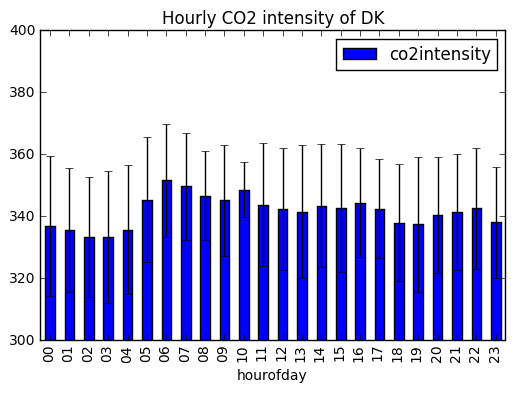

In [51]:
ctr = 'DK'
means = df[df['country'] == ctr].groupby(['hourofday']).mean()
errs = df[df['country'] == ctr].groupby(['hourofday']).std()
means.plot.bar(yerr=errs)
ax = plt.gca()
ax.set_ylim([300, 400])
ax.set_title('Hourly CO2 intensity of %s' % ctr)